In [112]:
# Simulate MCMC model data: pick the true parameter variables from the model's prior distribution.
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.stats import invgamma
from numpy.linalg import norm

In [132]:
# Number of persons.
P = 100
# Number of items.
I = 12
# Number of latent ability dimensions (sub-scales).
C = 5

In [133]:
# Generate latent ability distribution variances.
alpha_theta, beta_theta = 1, 1
rv = invgamma(a=alpha_theta, scale=beta_theta)
v = rv.rvs(C)
print(v)

[3.46955827 1.57407928 0.22400557 0.51477035 3.44689261]


(100, 5)


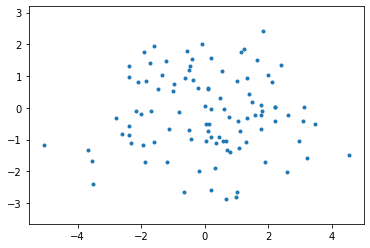

In [134]:
# Generate normally distributed student latent abilities.
cov = np.diag(v)
theta = np.random.multivariate_normal(np.zeros((C,)), cov, P)
print(theta.shape)
plt.plot(theta[:,0], theta[:,1], '.')
plt.axis('equal')
plt.show()

In [140]:
# Generate item difficulty parameters.
# Discrimination is uniform[0.5, 1.5].
a = np.random.random(size=(I,)) + 0.5
# Difficulty is equally spaced from -3 to 3.
b = np.linspace(-3, 3, num=I)
# Item i measures sub-scale c[i]. Select about the same number of items per subscale,
# then randomly permute the item order.
c = np.random.permutation(np.matlib.repmat(np.arange(C, dtype=int), int(np.ceil(I/C)), 1).ravel()[:I])
# Note: some sub-scales may have no items.
c = np.random.randint(low=0, high=C, size=(I,))
# Asymptote pi is fixed.
asym = 0.2
print(a)
print(b)
print(c)

[0.98889577 1.35162604 0.92720705 0.9484591  1.27117454 1.31482635
 0.9256064  0.72921374 1.21007114 0.55372376 0.80982011 1.14681717]
[-3.         -2.45454545 -1.90909091 -1.36363636 -0.81818182 -0.27272727
  0.27272727  0.81818182  1.36363636  1.90909091  2.45454545  3.        ]
[0 4 0 2 2 0 0 3 1 3 4 2]


In [141]:
# Generate item responses (the observed data).
t = np.exp(-a*(theta[:,c] - b))
p_correct = asym + (1-asym)*(t/(1+t))
X = np.random.binomial(1, p=p_correct)